In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Here we will use the MNIST dataset

In [4]:
df = pd.read_csv('mnist_train.csv', header=None)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data = df.values
np.random.shuffle(data)

In [9]:
Y = data[:, 0]
X = data[:, 1:]
print(X.shape, Y.shape)

(60000, 784) (60000,)


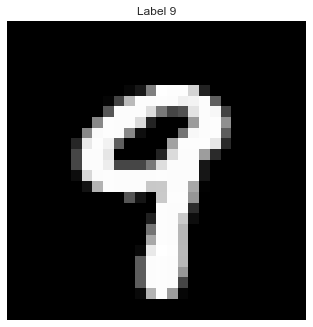

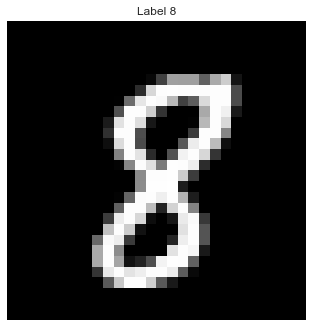

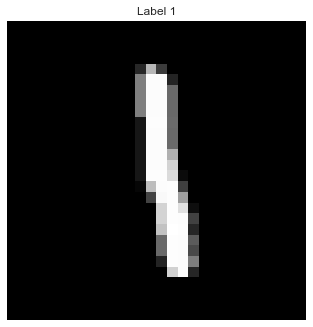

In [18]:
def drawImg(X, Y, i):
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title("Label " + str(Y[i]))
    plt.axis('off')
    plt.show()

for i in range(3):
    drawImg(X, Y, i)

In [13]:
# let's split the data into training and test set
split = int(0.80 * X.shape[0])
print(split)

48000


In [14]:
X_train = X[:split, :]
Y_train = Y[:split]

X_test = X[split:, :]
Y_test = Y[split:]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [32]:
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X, Y, query, k=5):
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(query, X[i])
        vals.append((d, Y[i]))
        
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)   # now vals has become the 2-D array
#     print(vals)    
    new_vals = vals[:, 1]
#     print(new_vals)
    new_vals = np.unique(new_vals, return_counts=True)
#     print(new_vals)
#     new_vals   is like   (array([0., 1.]), array([3, 2], dtype=int64))
    
    index = new_vals[1].argmax()   # it finds the index of max number 
    pred = new_vals[0][index]
    pred = int(pred)
    return pred    

In [23]:
plt.style.use('seaborn')

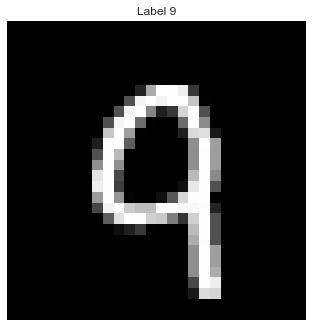

*******       9       *******


In [33]:
drawImg(X_test, Y_test, 59)

number = knn(X_train, Y_train, X_test[59])
print("*******      ", number , "      *******" )

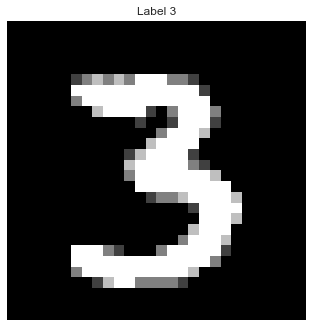

*******       3       *******


In [34]:
drawImg(X_test, Y_test, 532)

number = knn(X_train, Y_train, X_test[532])
print("*******      ", number , "      *******" )

In [35]:
def accuracy(X, Y, X_train, Y_train):
    m = X.shape[0]
    correct = 0
    
    for i in range(m):
        pred = knn(X_train, Y_train, X[i])
        if pred == Y[i]:
            correct += 1
    
    acc = (correct * 100.0) / m
    return acc

In [ ]:
prec = accuracy(X_test, Y_test, X_train, Y_train)

In [ ]:
print(prec)